# Read me
The [training](https://drive.google.com/file/d/1tfo6qm8zB5Eb7TY8WQGey-SqwBiC-3uO/view?usp=sharing) and [test](https://drive.google.com/file/d/1--yMo6lHVrkU9iqXUjLIJpKLYaz7QfLF/view?usp=sharing) data were downloaded from the [Zoo Galaxy](https://data.galaxyzoo.org/#section-21) platform, corresponding to Galaxy Zoo 2 ([images_gz2.zip](https://zenodo.org/records/3565489#.Y3vFKS-l0eY)).  

These data are stored in "[.pkl](https://drive.google.com/drive/folders/1XalRlt11sYmU11op2z3xPnVsRt8Pz0VM?usp=drive_link)" format instead of the original ".jpg" format to facilitate handling. The dataset consists of 10,000 training images and 5,000 test images. The information is reduced to 75 pixels per image, arranged in a 5x5 pixel grid with three color channels. To visualize the galaxy, it is necessary to reconstruct the image.

# Set up

## Packages

In [ ]:
# Mount Google Drive to access and store files
# Comment out this cell if running the script locally

from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to ensure access

Mounted at /content/drive


In [ ]:
# Standard libraries for file handling, data manipulation, and performance tracking
import os                # For managing file and directory operations
import io                # For byte stream handling (e.g., reading and writing in-memory files)
import math              # For mathematical operations like square roots, logarithms, etc.
import joblib            # For saving and loading machine learning models
import requests          # For making HTTP requests, like downloading files from the internet
import numpy as np       # For numerical operations and array manipulation
import pandas as pd      # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # For creating and displaying plots and visualizations

In [ ]:
# Import TensorFlow and Keras libraries for deep learning tasks
import tensorflow as tf        # TensorFlow for building and training machine learning models
from tensorflow import keras    # Keras for high-level neural networks API, built on TensorFlow

# Import machine learning preprocessing tools
from sklearn.preprocessing import LabelEncoder  # For converting categorical labels into numerical format

# Import tools for model validation and splitting
from sklearn.model_selection import StratifiedKFold  # For stratified K-fold cross-validation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Import Keras callbacks for model training management
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  # Callbacks for training control

## Funtions

In [ ]:
def load_logdata(data='train'):
    """
    Downloads and loads preprocessed training or testing log data from Google Drive.

    Parameters:
    - data (str): Specifies which log data to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded log data if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test log data
    if data.lower() == 'train':
        file_id = '1wDuS7VDzPIFEb7w_L6q1oe85ONsfEntC'  # File ID for log data train

    elif data.lower() == 'test':
        file_id = '1wAKlz1x5GZ0HbJYL90KcgVJKuDW2ZfIv'  # File ID for log data test

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = pd.read_csv(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_data(data='train'):
    """
    Downloads and loads preprocessed training or testing data from Google Drive.

    Parameters:
    - data (str): Specifies which dataset to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded dataset if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test datasets
    if data.lower() == 'train':
        file_id = '1-8JHObeY7kaU0qLt0p7WDFRJf6A6iYFN'  # File ID for training data

    elif data.lower() == 'test':
        file_id = '1bdjlyKp02O04uGkixX1E4mQMkUjvWRbL'  # File ID for test data

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = joblib.load(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_model(model='ipca'):
    """
    Downloads and loads a machine learning model from Google Drive.

    Parameters:
    - model (str): Specifies which model to load ('ipca' or 'scaler').

    Returns:
    - DATA (object or None): The loaded model object if successful, otherwise None.
    """

    # Define Google Drive file IDs for different models
    if model.lower() == 'ipca':
        file_id = '1s_reCv_xE5jQ_pKUtoPDsH6qPRJId_OL'  # File ID for the Incremental PCA model

    elif model.lower() == 'scaler':
        file_id = '1kl2dynGnyYr70_ChOOzQT3z1t3n7RB9w'  # File ID for the StandardScaler model

    else:
        print('Error: Invalid model type specified')  # Handle incorrect input
        return None

    # Construct the Google Drive download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Send a request to download the model file
    respuesta = requests.get(url)

    # Convert the downloaded content into a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the model using joblib
    MODEL = joblib.load(file_stream)

    # Confirm successful model loading
    print(f'Model loaded: {MODEL}')

    return MODEL

def single_reconverter(data):
    """
    Takes a single PCA-transformed data point, reverses the PCA and scaling transformations,
    and normalizes it before reshaping it into an image.

    Parameters:
    - data (numpy array): A single data point in PCA-reduced form.

    Returns:
    - norm_centroides (numpy array): Reconstructed image (174x174x3).
    """
    data = data.reshape(1, -1)  # Ensure data is a 2D array
    centroides = scaler.inverse_transform(data)  # Reverse standard scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA transformation
    norm_centroides = normalized(centroides)  # Normalize pixel values
    norm_centroides = norm_centroides.reshape(174, 174, 3)  # Reshape into an image
    return norm_centroides

def reconverter(data):
    """
    Reconstructs multiple PCA-reduced data points back into images.

    Parameters:
    - data (numpy array): Multiple PCA-transformed data points.

    Returns:
    - norm_centroides (numpy array): Reconstructed images with normalized pixel values.
    """
    centroides = scaler.inverse_transform(data)  # Reverse scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA
    norm_centroides = normalized(centroides)  # Normalize pixel values
    return norm_centroides

def normalized(data):
    """
    Normalizes data to the range [0,1] using min-max scaling.

    Parameters:
    - data (numpy array): Input data.

    Returns:
    - norm (numpy array): Normalized data.
    """
    norm = (data - data.min()) / (data.max() - data.min())  # Min-max normalization
    return norm

def rotar_imagen_2d(imagen, theta):
    """
    Rotates a 2D square image around its center by a given angle in radians.

    Parameters:
    - imagen (ndarray): 2D numpy array (NxN) representing the image.
    - theta (float): Rotation angle in radians.

    Returns:
    - rotada (ndarray): The rotated image (same shape as input).
    """
    N = imagen.shape[0]  # Assume square image (NxN)
    rotada = np.zeros_like(imagen)  # Initialize empty output image

    # Coordinates of the center of the image
    cx = (N - 1) / 2.0
    cy = (N - 1) / 2.0

    # Inner helper function to rotate a single pixel (i, j)
    def rotar_punto(i, j, cx, cy, theta):
        # Translate (i, j) to origin-centered coordinates
        x_tras = j - cx  # x (columns)
        y_tras = i - cy  # y (rows)

        # Apply rotation matrix
        x_rot =  x_tras * math.cos(theta) - y_tras * math.sin(theta)
        y_rot =  x_tras * math.sin(theta) + y_tras * math.cos(theta)

        # Translate back to original image coordinates
        j_nuevo = x_rot + cx
        i_nuevo = y_rot + cy

        return i_nuevo, j_nuevo

    # Loop over each pixel in the original image
    for i in range(N):
        for j in range(N):
            # Get the rotated position of pixel (i, j)
            i_n, j_n = rotar_punto(i, j, cx, cy, theta)

            # Round to nearest integer coordinates for indexing
            i_n = int(round(i_n))
            j_n = int(round(j_n))

            # Assign the pixel value to new position if within bounds
            if 0 <= i_n < N and 0 <= j_n < N:
                rotada[i_n, j_n] = imagen[i, j]

    return rotada

def generate_images(data_to_sample, clase):
    """
    Generates synthetic images for a given class by rotating existing samples.

    Parameters:
    - data_to_sample (DataFrame): A DataFrame containing PCA-transformed image data of a specific class.
    - clase (str): The name of the class to which synthetic images will be labeled.

    Returns:
    - data_to_sample (DataFrame): The original data concatenated with the newly generated synthetic samples.
    """

    # Select the first 75 samples as source images for augmentation
    pixeles = np.arange(75)
    sample_img = data_to_sample[pixeles]

    # Reconstruct images from PCA space and reshape to image format
    sample_img = reconverter(sample_img).reshape(-1, size_img, size_img, colors_chanels)

    # Determine how many synthetic images need to be created to reach 400 total
    img_to_generate = 400 - len(data_to_sample)
    gen_img = np.zeros((img_to_generate, size_img, size_img, colors_chanels))

    # Calculate number of rotated variants to generate per image
    n = math.ceil(img_to_generate / 7)
    print(f'Clase: {clase}')
    print(f'Imagenes a generar: {img_to_generate}\nVariaciones aproximadas de imagen original: {n}')

    # Define evenly spaced rotation angles between 0 and π radians
    angulos = np.linspace(0, math.pi, n)

    cuenta = 0
    # Generate new images by rotating the samples
    for i in range(len(data_to_sample)):
        for k in angulos:
            while cuenta != img_to_generate:
                new_img = rotar_imagen_2d(sample_img[i], k)
                gen_img[cuenta] = new_img
                cuenta += 1

    # Flatten images and apply PCA and scaling
    gen_img = gen_img.reshape(-1, size_img * size_img * colors_chanels)
    gen_img = ipca.transform(gen_img)
    gen_img = scaler.transform(gen_img)
    gen_img = np.asarray(gen_img, dtype=np.float32)

    # Prepare the synthetic data as a DataFrame
    columns = data_to_sample.keys()
    synthetic_data = pd.DataFrame()

    # Add NaNs for metadata columns (e.g., objid, asset_id)
    synthetic_data[columns[0]] = np.nan * np.ones(len(gen_img), dtype=np.float32)
    synthetic_data[columns[1]] = synthetic_data[columns[0]]

    # Set class label for synthetic samples
    synthetic_data[columns[2]] = np.full(len(gen_img), clase)

    # Add the transformed pixel data
    synthetic_data[columns[3:]] = gen_img

    # Concatenate original and synthetic data
    data_to_sample = pd.concat([data_to_sample, synthetic_data])

    return data_to_sample


## Directories

In [ ]:
### Drive roots ####

root_train ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/train_data.pkl'
root_test ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/test_data.pkl'

root_ipca = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
root_scaler = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

root_log_data = '/content/drive/MyDrive/Practicas_Profesionales/Data/Log_data/'

root_CNN = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/CNN/'
root_result = '/content/drive/MyDrive/Practicas_Profesionales/Results/CNN/'

In [ ]:
# ### Local roots ####

# root_train ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/train_data.pkl'
# root_test ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/test_data.pkl'

# root_ipca = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
# root_scaler = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

# root_CNN = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/'
# root_result = '/home/tonathiu/Fisica/Practicas_Profesionales/Results/CNN/'

## Load models

In [ ]:
# Load models from drive

ipca = load_model('ipca')
scaler = load_model('scaler')

Model loaded: IncrementalPCA(batch_size=100, n_components=75)
Model loaded: StandardScaler()


In [ ]:
# ## Run if you have file of ipca & scaler on your computer/Drive

# ipca = joblib.load(root_ipca)
# scaler = joblib.load(root_scaler)

# Data

## Load data

In [ ]:
# Load datasets from drive
train_data = load_data('train')
test_data = load_data('test')

train data loaded
Shape: (10000, 75)
test data loaded
Shape: (10000, 75)


## Load log data

In [ ]:
# Load the training and testing log data from Google Drive
log_data_train = load_logdata('train')
log_data_test = load_logdata('test')

train data loaded
Shape: (10000, 3)
test data loaded
Shape: (10000, 3)


## Balanced dataset

In [ ]:
# Convert the NumPy arrays of train and test data into DataFrames
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

# Concatenate both sets vertically into a single DataFrame
images_data = pd.concat([train_data, test_data])

# Display the resulting combined DataFrame
images_data


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.193801,-2.122406,-0.567502,-0.274515,1.270259,-1.652320,0.649912,-0.178453,2.040133,-0.814890,...,-0.094186,-0.420928,0.462837,0.104503,0.256826,0.198423,-0.209506,0.429842,-1.109325,-0.112327
1,1.350025,-2.181944,-1.212393,0.145420,0.650813,0.553854,-0.293505,-1.003359,1.916952,1.800129,...,0.719165,-0.312155,-0.137214,-0.544743,-0.205282,0.287545,0.203020,-1.132773,-0.285102,-0.604923
2,-0.454565,-1.545139,-2.096602,0.544285,-0.169941,-1.330452,-1.829134,-3.420800,1.092714,0.484080,...,1.205345,-1.881236,0.534878,-2.422315,-1.078914,-0.925927,0.204613,-0.035675,-0.509225,-0.463636
3,-0.537726,-0.525373,0.080935,2.112374,-1.023330,0.495413,1.326119,0.023961,1.972256,-0.014097,...,1.677891,-2.401186,-0.315201,-2.235925,2.234057,0.371385,-2.842219,-2.027612,1.239729,2.447851
4,-0.219215,0.845224,0.288898,1.020080,-0.703664,1.250558,-0.571507,-0.067560,0.993999,-0.024368,...,-0.846190,4.225138,-1.164362,1.043957,1.186783,-0.834451,1.785509,1.302684,-1.070868,-1.558125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.731763,0.016997,-0.704092,1.379323,0.108672,0.107929,0.570472,0.356720,-0.648275,-0.467928,...,-1.034046,0.055380,-0.059440,0.065435,-1.228923,0.022427,0.366420,-0.604354,1.206361,0.320934
9996,-0.150262,-0.489832,0.367777,-0.230208,0.690884,0.422780,-0.806866,0.336192,-0.070972,-0.168836,...,-1.492454,-1.819121,-0.134685,2.385706,1.604426,1.402977,1.284325,0.901799,2.244963,0.458297
9997,-0.375557,0.259079,-0.019227,-0.855124,-0.417715,0.663949,0.033250,0.470944,0.264501,0.430345,...,1.156294,-0.008040,1.133729,-0.304584,0.471606,-0.463449,-0.723865,-0.677335,-0.820530,0.281050
9998,-0.460908,0.918137,2.064845,1.368463,-0.433186,-1.915210,-0.339651,-3.709813,-1.835825,-0.115855,...,0.471850,-0.083458,-0.455943,2.425351,-0.092701,-1.049358,-0.670741,-1.161204,-2.042993,1.004311


In [ ]:
# Combine training and testing metadata into a single DataFrame
log_data = pd.concat([log_data_train, log_data_test])

# Display the combined DataFrame
log_data

,dr7objid,asset_id,gz2_class
0,587733079744512108,253043,Ec
1,588295842860105844,238739,Ec
2,587730847961645743,274697,Ser
3,587732053237366856,50470,Er
4,587739096983076959,117625,Sb
...,...,...,...
9995,587737809029693753,105609,Ei
9996,587739721897672727,139198,Er
9997,588848901515706512,273751,Sc
9998,587732702335008945,60082,Ser


In [ ]:
# Merge the log metadata with the corresponding PCA image data along columns
All_data = pd.concat([log_data, images_data], axis=1)

# Display the combined DataFrame
All_data

,dr7objid,asset_id,gz2_class,0,1,2,3,4,5,6,...,65,66,67,68,69,70,71,72,73,74
0,587733079744512108,253043,Ec,-0.193801,-2.122406,-0.567502,-0.274515,1.270259,-1.652320,0.649912,...,-0.094186,-0.420928,0.462837,0.104503,0.256826,0.198423,-0.209506,0.429842,-1.109325,-0.112327
1,588295842860105844,238739,Ec,1.350025,-2.181944,-1.212393,0.145420,0.650813,0.553854,-0.293505,...,0.719165,-0.312155,-0.137214,-0.544743,-0.205282,0.287545,0.203020,-1.132773,-0.285102,-0.604923
2,587730847961645743,274697,Ser,-0.454565,-1.545139,-2.096602,0.544285,-0.169941,-1.330452,-1.829134,...,1.205345,-1.881236,0.534878,-2.422315,-1.078914,-0.925927,0.204613,-0.035675,-0.509225,-0.463636
3,587732053237366856,50470,Er,-0.537726,-0.525373,0.080935,2.112374,-1.023330,0.495413,1.326119,...,1.677891,-2.401186,-0.315201,-2.235925,2.234057,0.371385,-2.842219,-2.027612,1.239729,2.447851
4,587739096983076959,117625,Sb,-0.219215,0.845224,0.288898,1.020080,-0.703664,1.250558,-0.571507,...,-0.846190,4.225138,-1.164362,1.043957,1.186783,-0.834451,1.785509,1.302684,-1.070868,-1.558125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,587737809029693753,105609,Ei,-0.731763,0.016997,-0.704092,1.379323,0.108672,0.107929,0.570472,...,-1.034046,0.055380,-0.059440,0.065435,-1.228923,0.022427,0.366420,-0.604354,1.206361,0.320934
9996,587739721897672727,139198,Er,-0.150262,-0.489832,0.367777,-0.230208,0.690884,0.422780,-0.806866,...,-1.492454,-1.819121,-0.134685,2.385706,1.604426,1.402977,1.284325,0.901799,2.244963,0.458297
9997,588848901515706512,273751,Sc,-0.375557,0.259079,-0.019227,-0.855124,-0.417715,0.663949,0.033250,...,1.156294,-0.008040,1.133729,-0.304584,0.471606,-0.463449,-0.723865,-0.677335,-0.820530,0.281050
9998,587732702335008945,60082,Ser,-0.460908,0.918137,2.064845,1.368463,-0.433186,-1.915210,-0.339651,...,0.471850,-0.083458,-0.455943,2.425351,-0.092701,-1.049358,-0.670741,-1.161204,-2.042993,1.004311


In [ ]:
# Convert the first PCA-transformed image back to its original RGB format
sample_data = single_reconverter(np.array(train_data.iloc[0]))

# Determine the number of color channels (3 for RGB)
colors_chanels = sample_data.shape[-1]

# Get the height (and width) of the image
size_img = sample_data.shape[0]

# Count the number of samples per galaxy class in the full dataset
cuenta_clases = dict(All_data['gz2_class'].value_counts())

In [ ]:
# Create two DataFrames to store balanced class data:
# - 'opulencia': Classes that already have ≥400 samples (downsampled to 400)
# - 'carencia' : Classes with <400 samples (to be augmented up to 400)
opulencia = pd.DataFrame()
carencia = pd.DataFrame()

# Loop through each class and apply appropriate sampling/augmentation
for clase in cuenta_clases:
    num_galxies = cuenta_clases[clase]

    if num_galxies >= 400:
        # If the class is over-represented, sample only 400 examples
        data_to_sample = All_data[All_data['gz2_class'] == clase].sample(400, random_state=31)
        opulencia = pd.concat([opulencia, data_to_sample]).reset_index(drop=True)

    else:
        # If the class is under-represented, generate synthetic samples to reach 400
        data_to_sample = All_data[All_data['gz2_class'] == clase]
        data_to_sample = generate_images(data_to_sample, clase)
        carencia = pd.concat([carencia, data_to_sample]).reset_index(drop=True)


Clase: Sd
Imagenes a generar: 139
Variaciones aproximadas de imagen original: 20
Clase: Sa
Imagenes a generar: 362
Variaciones aproximadas de imagen original: 52
Clase: A
Imagenes a generar: 365
Variaciones aproximadas de imagen original: 53
Clase: Seb
Imagenes a generar: 393
Variaciones aproximadas de imagen original: 57


In [ ]:
# Combine the balanced data from both over- and under-represented classes
data_to_use = pd.concat([opulencia, carencia]).reset_index(drop=True)

## Dataset

In [ ]:
# Extract key metadata columns for logging or reference
Log_data = data_to_use[['dr7objid', 'asset_id', 'gz2_class']]

# Extract the PCA features for model training
Train_data = np.array(data_to_use[np.arange(75)])


## Labels

In [ ]:
# Initialize the LabelEncoder to convert categorical labels into numerical values
encoder = LabelEncoder()

# Fit the encoder on the 'gz2_class' column and transform the labels into numerical format
labels = encoder.fit_transform(Log_data['gz2_class'])

# Add the encoded labels as a new column 'labels' in the log_data_train DataFrame
Log_data['labels'] = labels

# Determine the number of unique classes in the sampled labels
classes = len(encoder.classes_)

<ipython-input-18-d4b424dc4499>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Log_data['labels'] = labels


# CNN

In [ ]:
def create_model(input_shape, num_classes):
    """
    Builds and compiles a Convolutional Neural Network (CNN) model for multi-class classification.

    Parameters:
    - input_shape (tuple): Shape of the input images (height, width, channels).
    - num_classes (int): Number of output classes for classification.

    Returns:
    - modelCNN (tf.keras.Model): Compiled CNN model.
    """

    modelCNN = keras.Sequential()

    # Input layer with specified image shape
    modelCNN.add(keras.layers.Input(shape=input_shape))

    # First convolutional block
    modelCNN.add(keras.layers.Conv2D(64, (6, 6), padding='same', activation='relu'))
    modelCNN.add(keras.layers.MaxPooling2D((3, 3)))

    # Second convolutional block
    modelCNN.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    modelCNN.add(keras.layers.MaxPooling2D((3, 3)))

    # Third convolutional layer (no pooling)
    modelCNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

    # Flatten the output from the convolutional layers
    modelCNN.add(keras.layers.Flatten())

    # Fully connected (dense) layer with dropout for regularization
    modelCNN.add(keras.layers.Dense(64, activation='relu'))
    modelCNN.add(keras.layers.Dropout(0.5))

    # Output layer with softmax activation for multi-class classification
    modelCNN.add(keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model with Adam optimizer and sparse categorical crossentropy
    modelCNN.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return modelCNN

# Display the model architecture
create_model(sample_data.shape, classes).summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 174, 174, 64)        │           6,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 587,500 (2.24 MB)

 Trainable params: 587,500 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

# Train with out k-fold

In [ ]:
# Split the sampled dataset into training and validation sets using stratified sampling
x_train,x_vali,y_train,y_vali = train_test_split(Train_data,labels,test_size=0.25,stratify=labels,random_state=13)

# Reconstruct transformed training data into image format
x_train = reconverter(x_train)
x_train = x_train.reshape(-1,size_img,size_img,colors_chanels)

# Reconstruct and reshape the validation data
x_vali = reconverter(x_vali)
x_vali = x_vali.reshape(-1,size_img,size_img,colors_chanels)

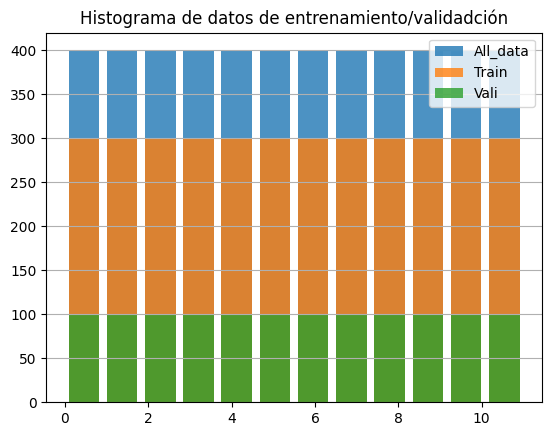

In [ ]:
# Plot histogram to compare class distributions across full, training, and validation sets

plt.figure()
plt.title('Histograma de datos de entrenamiento/validación')

# Define the number of bins based on the number of unique classes
bins = len(np.unique(y_train))

# Plot histogram for all data labels
plt.hist(labels, bins=bins, rwidth=0.8, label='All_data', alpha=0.8)

# Plot histogram for training set
plt.hist(y_train, bins=bins, rwidth=0.8, label='Train', alpha=0.8)

# Plot histogram for validation set
plt.hist(y_vali, bins=bins, rwidth=0.8, label='Vali', alpha=0.8)

# Add legend and grid
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()


In [ ]:
# Define callbacks to improve training and prevent overfitting for the balanced dataset

# Stop training early if validation loss doesn't improve for 5 consecutive epochs
early_stopping = EarlyStopping(
    monitor='val_loss',         # Watch validation loss
    patience=5,                 # Stop if no improvement after 5 epochs
    restore_best_weights=True  # Restore weights from best-performing epoch
)

# Reduce learning rate when the model hits a plateau on validation loss
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',         # Watch validation loss
    factor=0.2,                 # Reduce learning rate by a factor of 0.2
    patience=5,                 # Wait 5 epochs before reducing
    min_lr=1e-6                 # Minimum allowable learning rate
)

# Set the path to save the best model trained on the balanced dataset
root_save = os.path.join(root_CNN, 'Model_no_kfold_balanced.keras')

# Save the model only when it achieves the best validation loss
model_checkpoint = ModelCheckpoint(
    root_save,                  # File path to save model
    monitor='val_loss',         # Watch validation loss
    save_best_only=True,        # Save only the best model
    save_weights_only=False,    # Save the full model, not just weights
    mode='min',                 # Lower validation loss is better
    verbose=2                   # Print when model is saved
)

In [ ]:
# Initialize the CNN model with the given input shape and number of output classes
modelo = create_model(input_shape=sample_data.shape, num_classes=classes)

# Train the model on the balanced dataset with validation and callbacks
history = modelo.fit(
    x_train, y_train,                # Training data and labels
    epochs=40,                       # Maximum number of epochs
    batch_size=64,                  # Batch size for training
    validation_data=(x_vali, y_vali),  # Validation data
    callbacks=[                     # Callback functions to control training
        early_stopping,             # Stop early if no improvement
        model_checkpoint,           # Save the best model
        reduce_lr                   # Adjust learning rate on plateau
    ]
)

Epoch 1/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1453 - loss: 2.4153
Epoch 1: val_loss improved from inf to 2.06844, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/CNN/Model_no_kfold_balanced.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 325s 6s/step - accuracy: 0.1461 - loss: 2.4136 - val_accuracy: 0.2825 - val_loss: 2.0684 - learning_rate: 0.0010
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2800 - loss: 2.0802
Epoch 2: val_loss improved from 2.06844 to 1.89320, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/CNN/Model_no_kfold_balanced.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 359s 5s/step - accuracy: 0.2803 - loss: 2.0797 - val_accuracy: 0.3442 - val_loss: 1.8932 - learning_rate: 0.0010
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3255 - loss: 1.9591
Epoch 3: val_loss improved from 1.89320 to 1.67487, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/CNN/Model_no_kfold_bala

Esto va a tardar como hora y media

*   Epoca 27, paso 51, hora: 12:18
*   Epoca 30, paso 46, hora: 12:34



In [ ]:
# Free up memory by deleting the training and validation data from RAM
x_train,x_vali = None,None

In [ ]:
# Extract training and validation metrics from the model's history

# Training accuracy and loss over epochs
exa = history.history['accuracy']       # Training accuracy
loss = history.history['loss']          # Training loss

# Validation accuracy and loss over epochs
exa_val = history.history['val_accuracy']  # Validation accuracy
loss_val = history.history['val_loss']     # Validation loss

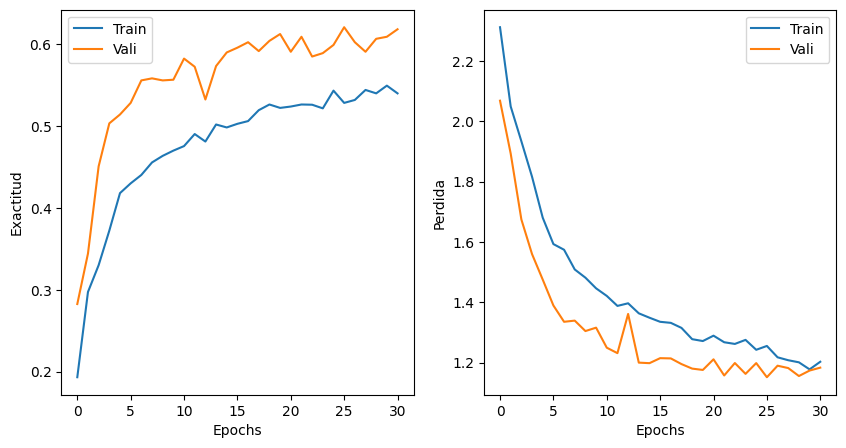

In [ ]:
# Plot training and validation accuracy and loss across epochs

plt.figure(figsize=(10, 5))  # Create a wide figure with 2 side-by-side subplots

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(exa, label='Train')       # Training accuracy
plt.plot(exa_val, label='Vali')    # Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train')      # Training loss
plt.plot(loss_val, label='Vali')   # Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Display both plots
plt.show()
